In [29]:
###---IMPORT LIBRARY---###

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

In [31]:
###---DATA PREPROCESSING & EXPLORING---###

In [32]:
df = pd.read_csv('Bike Buyers.csv')
print(df)

        ID Marital Status  Gender    Income  Children        Education  \
0    12496        Married  Female   40000.0       1.0        Bachelors   
1    24107        Married    Male   30000.0       3.0  Partial College   
2    14177        Married    Male   80000.0       5.0  Partial College   
3    24381         Single     NaN   70000.0       0.0        Bachelors   
4    25597         Single    Male   30000.0       0.0        Bachelors   
..     ...            ...     ...       ...       ...              ...   
995  23731        Married    Male   60000.0       2.0      High School   
996  28672         Single    Male   70000.0       4.0  Graduate Degree   
997  11809        Married     NaN   60000.0       2.0        Bachelors   
998  19664         Single    Male  100000.0       3.0        Bachelors   
999  12121         Single    Male   60000.0       3.0      High School   

         Occupation Home Owner  Cars Commute Distance         Region   Age  \
0    Skilled Manual        Yes   

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


In [34]:
df.columns
countColumn = df.columns.value_counts()
print(countColumn)

totalColumn = countColumn.sum()
print("Total columns: ", totalColumn)

ID                  1
Marital Status      1
Gender              1
Income              1
Children            1
Education           1
Occupation          1
Home Owner          1
Cars                1
Commute Distance    1
Region              1
Age                 1
Purchased Bike      1
dtype: int64
Total columns:  13


In [35]:
columns = df.columns
print(columns)

for col in columns:
     if df[col].isna().any():
        # Find the mode (most common value) of the column
        mode_value = df[col].mode()[0]
        
        # Fill missing values with the mode
        df[col].fillna(mode_value, inplace=True)

print(df)

Index(['ID', 'Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age',
       'Purchased Bike'],
      dtype='object')
        ID Marital Status  Gender    Income  Children        Education  \
0    12496        Married  Female   40000.0       1.0        Bachelors   
1    24107        Married    Male   30000.0       3.0  Partial College   
2    14177        Married    Male   80000.0       5.0  Partial College   
3    24381         Single    Male   70000.0       0.0        Bachelors   
4    25597         Single    Male   30000.0       0.0        Bachelors   
..     ...            ...     ...       ...       ...              ...   
995  23731        Married    Male   60000.0       2.0      High School   
996  28672         Single    Male   70000.0       4.0  Graduate Degree   
997  11809        Married    Male   60000.0       2.0        Bachelors   
998  19664         Single    Male  100000.0       3.0   

In [36]:
# df.to_excel('Bike Buyers Cleaned.xlsx')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    1000 non-null   object 
 2   Gender            1000 non-null   object 
 3   Income            1000 non-null   float64
 4   Children          1000 non-null   float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        1000 non-null   object 
 8   Cars              1000 non-null   float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               1000 non-null   float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


In [38]:
df.describe()

,ID,Income,Children,Cars,Age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,19965.992000,56290.000000,1.895000,1.460000,44.148000
std,5347.333948,30975.722678,1.629303,1.117877,11.322557
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


In [39]:
dataCorrelation = df.corr()
print(dataCorrelation)

                ID    Income  Children      Cars       Age
ID        1.000000 -0.074858 -0.028728  0.017768 -0.053234
Income   -0.074858  1.000000  0.253091  0.433812  0.170501
Children -0.028728  0.253091  1.000000  0.268914  0.524191
Cars      0.017768  0.433812  0.268914  1.000000  0.184500
Age      -0.053234  0.170501  0.524191  0.184500  1.000000


C:\Users\Admin\AppData\Local\Temp\ipykernel_5872\1628737746.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataCorrelation = df.corr()


<Axes: >

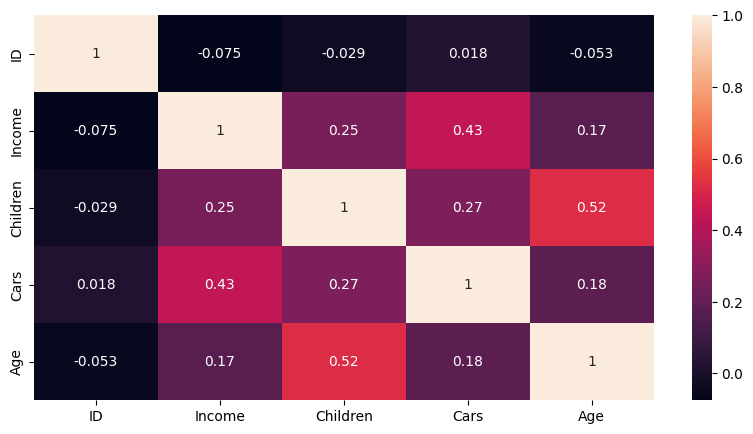

In [40]:
plt.figure(figsize=(10,5))
sns.heatmap(dataCorrelation, annot=True)

In [41]:
###---DATA VISUALIZATION---###

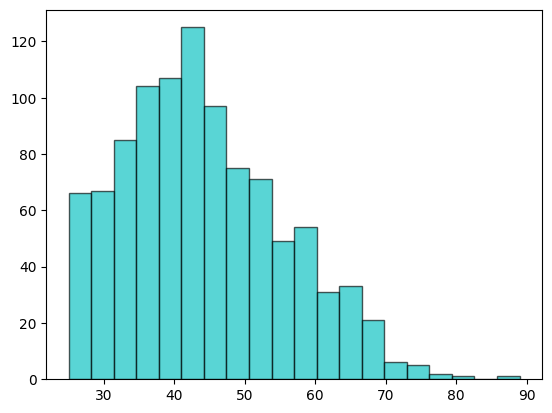

In [42]:
selectedColumn = df['Age']

histogram = plt.hist(selectedColumn, bins=20, color='c', edgecolor='k', alpha=0.65)

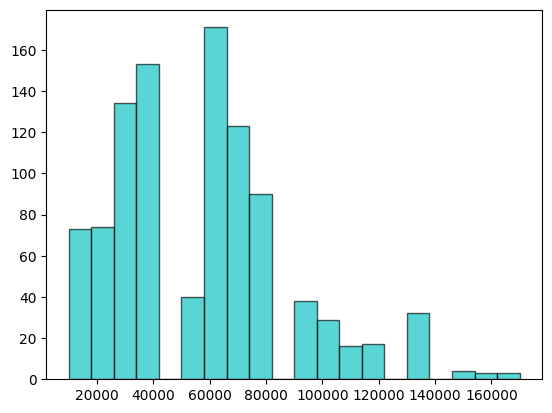

In [43]:
selectedColumn = df['Income']

histogram = plt.hist(selectedColumn, bins=20, color='c', edgecolor='k', alpha=0.65)

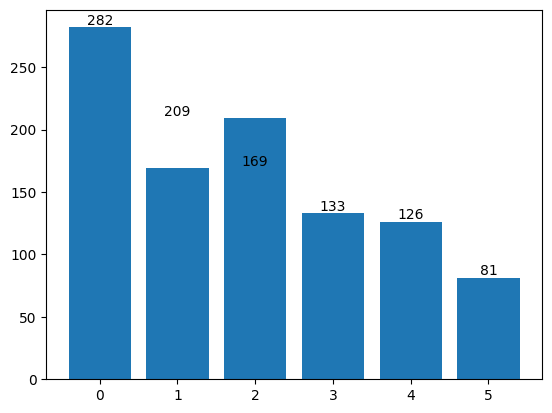

In [65]:
selectedColumn = df['Children'].value_counts()

barchart = plt.bar(selectedColumn.index, selectedColumn.values)

for i, v in enumerate(selectedColumn.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

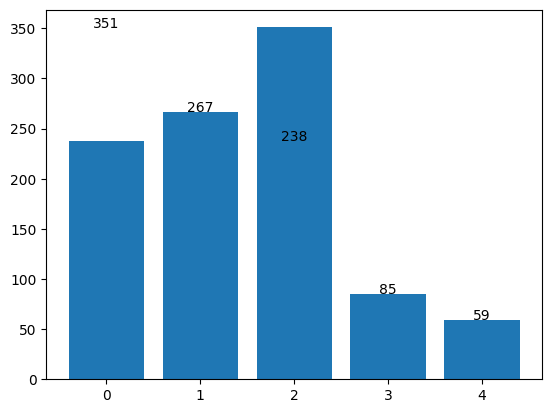

In [59]:
selectedColumn = df['Cars'].value_counts()

barchart = plt.bar(selectedColumn.index, selectedColumn.values)

for i, v in enumerate(selectedColumn.values):
    plt.text(i, v, str(v), ha='center')

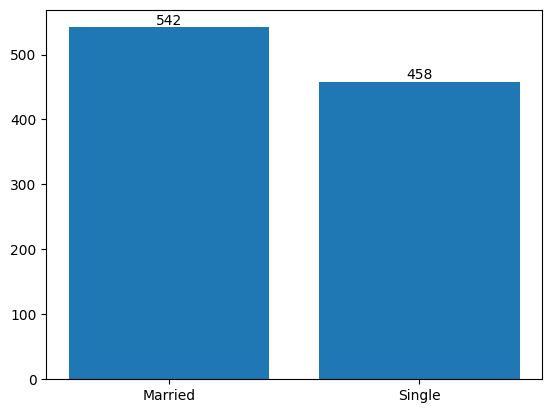

In [45]:
selectedColumn = df['Marital Status'].value_counts()

barchart = plt.bar(selectedColumn.index, selectedColumn.values)
for i, v in enumerate(selectedColumn.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

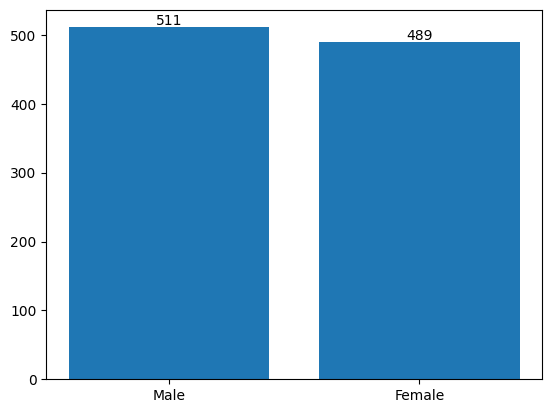

In [46]:
selectedColumn = df['Gender'].value_counts()

barchart = plt.bar(selectedColumn.index, selectedColumn.values)
for i, v in enumerate(selectedColumn.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

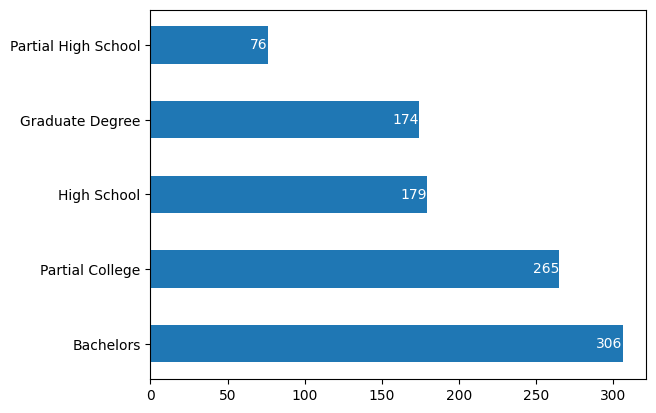

In [47]:
selectedColumn = df['Education'].value_counts()

horizontalBarchart = plt.barh(selectedColumn.index, selectedColumn.values, height=0.5)
for i, v in enumerate(selectedColumn.values):
    plt.text(v, i, str(v), ha='right', va='center', color='white')

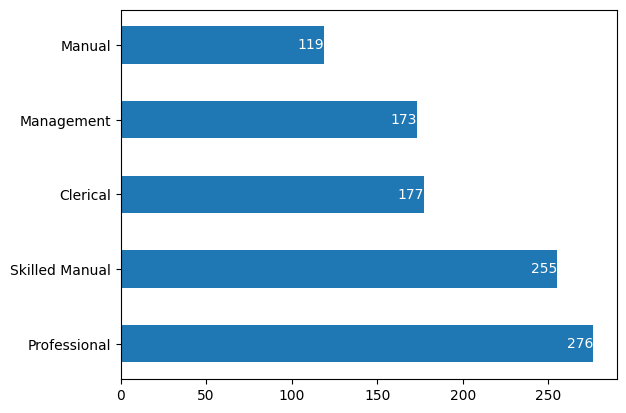

In [48]:
selectedColumn = df['Occupation'].value_counts()
colors = plt.cm.viridis(np.linspace(0, 1, len(selectedColumn)))

horizontalBarchart = plt.barh(selectedColumn.index, selectedColumn.values, height=0.5)
for i, v in enumerate(selectedColumn.values):
    plt.text(v, i, str(v), ha='right', va='center', color='white')

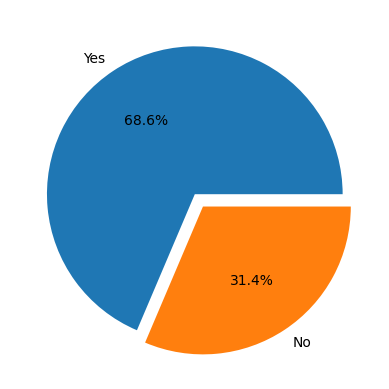

In [49]:
selectedColumn = df['Home Owner'].value_counts()

piechart = plt.pie(selectedColumn, autopct='%1.1f%%', labels=selectedColumn.index, explode=(0, 0.1))

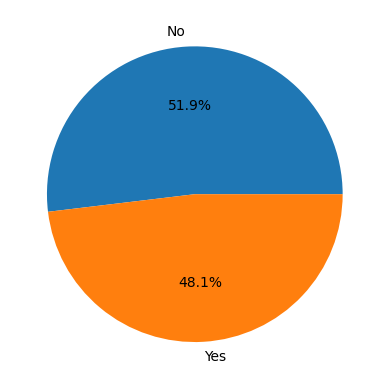

In [50]:
selectedColumn = df['Purchased Bike'].value_counts()

piechart = plt.pie(selectedColumn, autopct='%1.1f%%', labels=selectedColumn.index)

In [ ]:
###---MACHINE LEARNING---###

In [125]:
df = pd.read_excel('Bike Buyers Cleaned.xlsx')

Accuracy: 59.50%


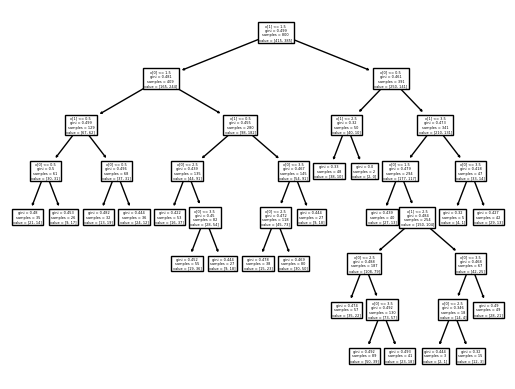

In [117]:
#DECISION TREE
convertColumn = {'Yes': 1, 'No': 0}
df['Purchased Bike'].dtype
df['Purchased Bike'] = df['Purchased Bike'].map(convertColumn)
df.head()

ageDiscretizer = KBinsDiscretizer(n_bins=5, encode='ordinal')
df['Age'] = ageDiscretizer.fit_transform(df[['Age']])

incomeDiscretizer = KBinsDiscretizer(n_bins=5, encode='ordinal')
df['Income'] = incomeDiscretizer.fit_transform(df[['Income']])

features = [
            # 'Age',
            # 'Children',
            'Income',
            'Cars',
            ]

x = df[features]
y = df['Purchased Bike']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

dtree = DecisionTreeClassifier()
dtree = dtree.fit(x_train, y_train)

tree.plot_tree(dtree)
y_pred = dtree.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 56.50%


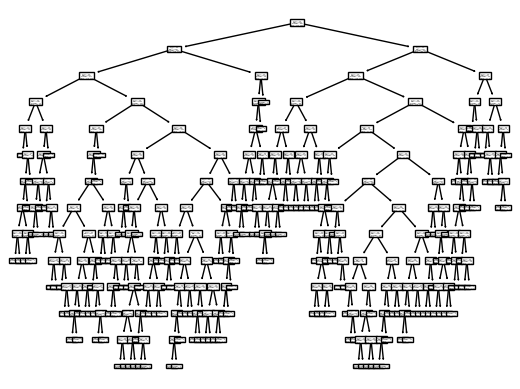

In [126]:
#DECISION TREE
convertColumn = {'Yes': 1, 'No': 0}
df['Purchased Bike'].dtype
df['Purchased Bike'] = df['Purchased Bike'].map(convertColumn)
df.head()

ageDiscretizer = KBinsDiscretizer(n_bins=5, encode='ordinal')
df['Age'] = ageDiscretizer.fit_transform(df[['Age']])

incomeDiscretizer = KBinsDiscretizer(n_bins=5, encode='ordinal')
df['Income'] = incomeDiscretizer.fit_transform(df[['Income']])

features = [
            'Age',
            'Children',
            'Income',
            'Cars',
            ]

x = df[features]
y = df['Purchased Bike']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

dtree = DecisionTreeClassifier()
dtree = dtree.fit(x_train, y_train)

tree.plot_tree(dtree)
y_pred = dtree.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 59.50%


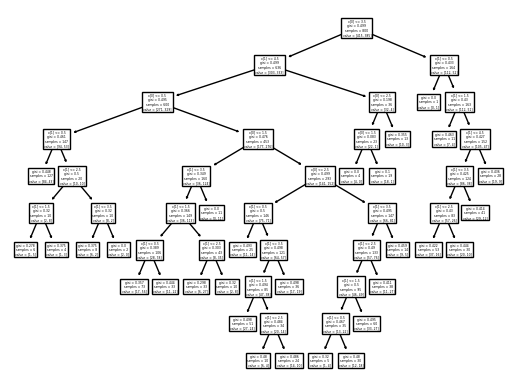

In [124]:
#DECISION TREE
convertColumn = {'Yes': 1, 'No': 0}
df['Purchased Bike'].dtype
df['Purchased Bike'] = df['Purchased Bike'].map(convertColumn)
df.head()

ageDiscretizer = KBinsDiscretizer(n_bins=5, encode='ordinal')
df['Age'] = ageDiscretizer.fit_transform(df[['Age']])

incomeDiscretizer = KBinsDiscretizer(n_bins=5, encode='ordinal')
df['Income'] = incomeDiscretizer.fit_transform(df[['Income']])

features = [
            'Age',
            'Children',
            # 'Income',
            # 'Cars',
            ]

x = df[features]
y = df['Purchased Bike']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

dtree = DecisionTreeClassifier()
dtree = dtree.fit(x_train, y_train)

tree.plot_tree(dtree)
y_pred = dtree.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")